Task 3: 
- Analyze if there is a relationship between the price range and the availability of online delivery and table booking.
- Determine if higher-priced restaurants are more likely to offer these services.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/Users/tilakpatel/Personel/Cognifyz intern/code/Data/Dataset.csv', encoding='utf-8')
df = df.dropna(subset=['Cuisines'])

In [2]:
df_price_range = df.copy()


In [3]:
df_online_delivery = df_price_range.pivot_table(index='Price range', values='Restaurant Name', columns='Has Online delivery', aggfunc='size')
df_table_booking = df_price_range.pivot_table(index='Price range', values='Restaurant Name', columns='Has Table booking', aggfunc='size')

In [4]:
total_restaurants = df_price_range['Price range'].value_counts()
total_restaurants

Price range
1    4438
2    3113
3    1405
4     586
Name: count, dtype: int64

In [5]:
for i in range(4):
    df_online_delivery.iloc[i, 0] = round((df_online_delivery.iloc[i, 0] / total_restaurants[i+1]) * 100)
    df_online_delivery.iloc[i, 1] = round((df_online_delivery.iloc[i, 1] / total_restaurants[i+1]) * 100)

df_online_delivery

Has Online delivery,No,Yes
Price range,,
1,84,16
2,59,41
3,71,29
4,91,9


In [6]:
for i in range(4):
    df_table_booking.iloc[i, 0] = round((df_table_booking.iloc[i, 0] / total_restaurants[i+1]) * 100)
    df_table_booking.iloc[i, 1] = round((df_table_booking.iloc[i, 1] / total_restaurants[i+1]) * 100)

df_table_booking

Has Table booking,No,Yes
Price range,,
1,100,0
2,92,8
3,54,46
4,53,47


In [7]:
df_merge = df_table_booking.merge(df_online_delivery, on='Price range', how='inner')

In [8]:
df_merge
df_merge.columns = pd.MultiIndex.from_tuples([
    ("Has Table booking", "No"), 
    ("Has Table booking", "Yes"),
    ("Has Online delivery", "No"),
    ("Has Online delivery", "Yes")
])
df_merge

Has Table booking     Has Online delivery    
                           No Yes                  No Yes
Price range                                              
1                         100   0                  84  16
2                          92   8                  59  41
3                          54  46                  71  29
4                          53  47                  91   9

In [9]:
df_copy = df_merge.copy()

df_copy.reset_index(inplace=True)

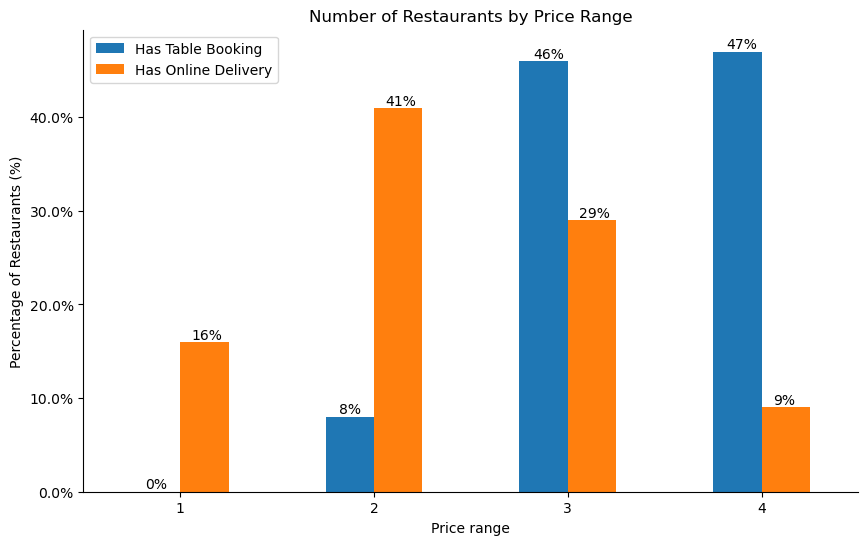

In [10]:
df_copy.plot(kind='bar', x='Price range', y=[('Has Table booking', 'Yes'), ('Has Online delivery', 'Yes')], figsize=(10, 6))
plt.xticks(rotation=0)
plt.ylabel("Percentage of Restaurants (%)")
plt.title("Number of Restaurants by Price Range")
plt.legend(["Has Table Booking", "Has Online Delivery"])
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x}%'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for idx, val in enumerate(df_copy['Has Table booking']['Yes']):
    plt.text(idx-0.18, val, f"{val}%", va='bottom', color='black')
for idx, val in enumerate(df_copy['Has Online delivery']['Yes']):
    plt.text(idx+0.06, val, f"{val}%", va='bottom', color='black')
plt.show()

- Higher-priced restaurants prioritize table booking services, likely catering to dine-in customers.
- Mid-range restaurants focus more on online delivery, aligning with convenience-focused customers.
- Cheaper restaurants have limited services, focusing primarily on affordability.
- This suggests that businesses in higher price ranges should focus on enhancing the dine-in experience, while mid-range restaurants can gain an edge by optimizing delivery services.